In [20]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.model_selection import cross_val_score 
dta =sm.datasets.fair.load_pandas().data

### Data Pre-Processing-

In [21]:
#add "affair" column: 1 represents having affairs, 0
#represents not
dta['affair'] = (dta.affairs >0).astype(int)

In [22]:
dta.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1


## Data Exploration-

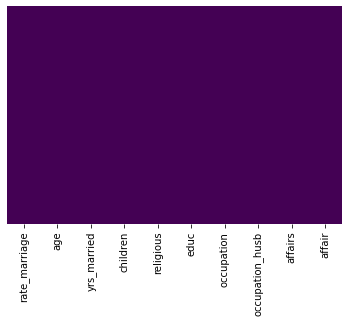

In [31]:
import seaborn as sns
sns.heatmap(dta.isnull(),yticklabels=False,cbar=False,cmap='viridis')

0    4313
1    2053
Name: affair, dtype: int64


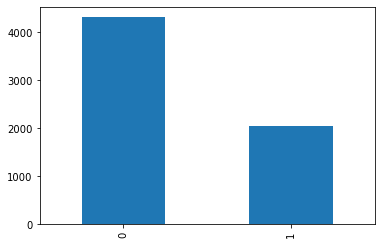

In [4]:
## checking the balance of the data by plotting the count of outcomes by their value
color_wheel = {1: "#0392cf", 
               2: "#7bc043"}
colors = dta["affair"].map(lambda x: color_wheel.get(x + 1))
print(dta.affair.value_counts())
p=dta.affair.value_counts().plot(kind="bar")


### The above graph shows that the data is biased towards outcome of 0s.where it means that affair is not present actually. The number of non-affair women is almost twice the number of women with affairs

In [23]:
dta.groupby(['affair']).mean()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
affair,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243


### We can see that on average, women who have affairs rate their marriages lower, which is to be expected. 


In [24]:
dta.groupby('rate_marriage').mean()

,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
rate_marriage,,,,,,,,,
1.0,33.823232,13.914141,2.308081,2.343434,13.848485,3.232323,3.838384,1.201671,0.747475
2.0,30.471264,10.727011,1.735632,2.330460,13.864943,3.327586,3.764368,1.615745,0.635057
3.0,30.008056,10.239174,1.638469,2.308157,14.001007,3.402820,3.798590,1.371281,0.550856
4.0,28.856601,8.816905,1.369536,2.400981,14.144514,3.420161,3.835861,0.674837,0.322926
5.0,28.574702,8.311662,1.252794,2.506334,14.399776,3.454918,3.892697,0.348174,0.181446


### It seems an increase in age, yrs_married, and children appears to correlate with a declining marriage rating.


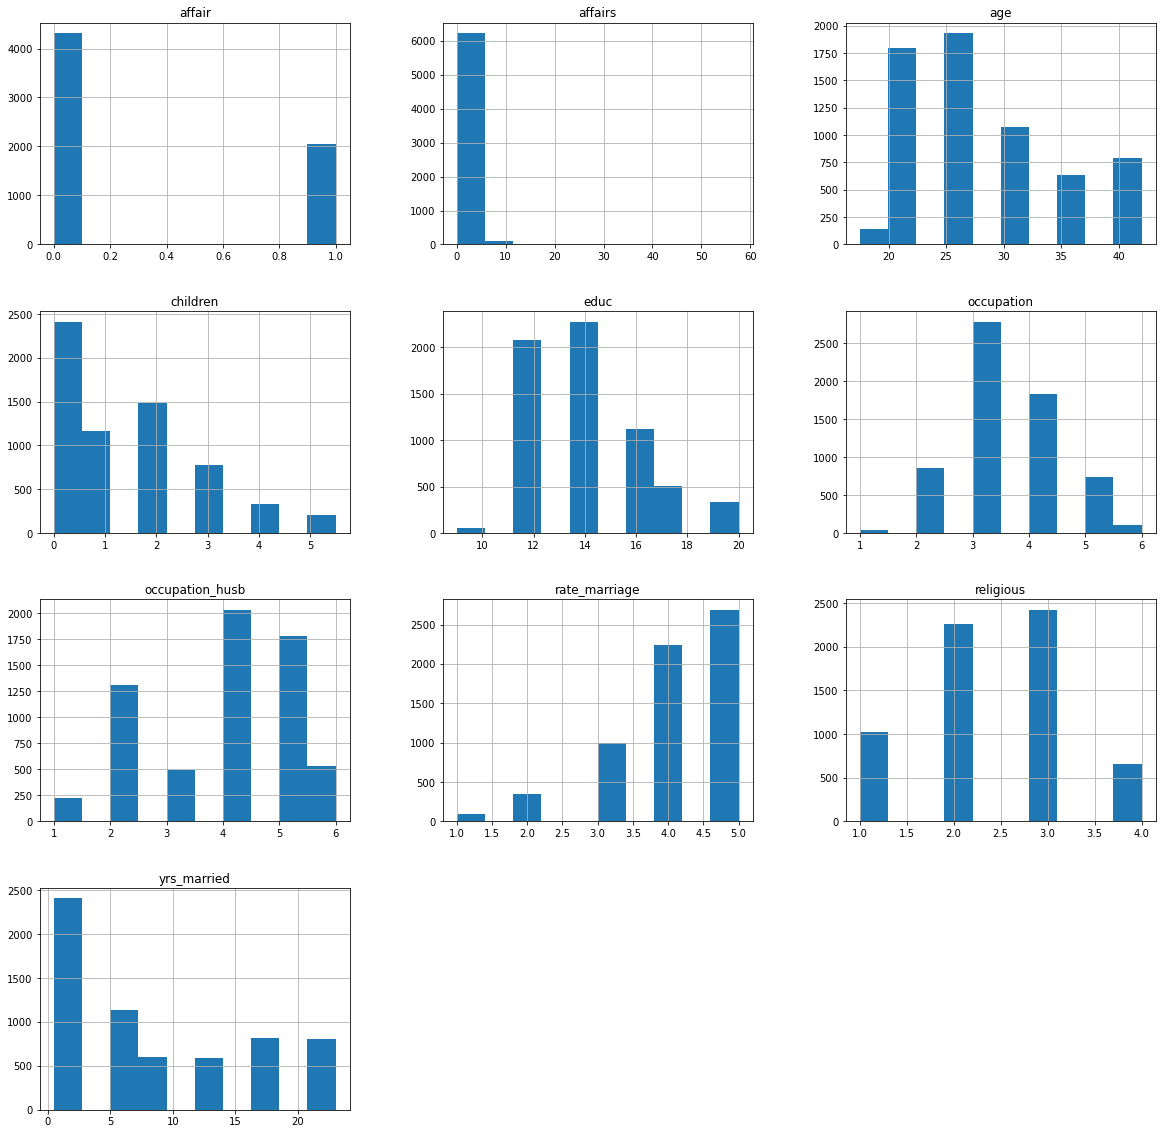

In [25]:
p=dta.hist(figsize = (20,20))

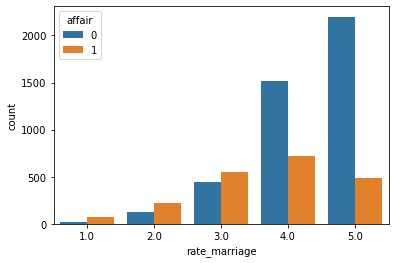

In [26]:
sns.countplot(x=dta['rate_marriage'],hue=dta['affair'])

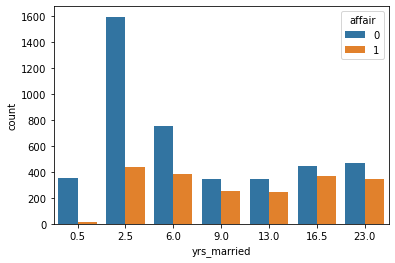

In [28]:
sns.countplot(x=dta['yrs_married'],hue=dta['affair'])

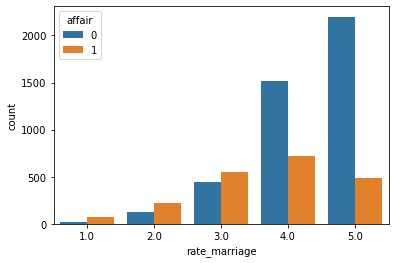

In [29]:
sns.countplot(x=dta['rate_marriage'],hue=dta['affair'])

### percentage of affair by years of marriage 

Text(0, 0.5, 'Percentage')

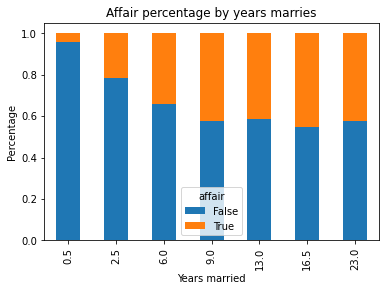

In [30]:
p=pd.crosstab(dta.yrs_married,dta.affair.astype(bool))
p.div(p.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.title("Affair percentage by years marries")
plt.xlabel("Years married")
plt.ylabel("Percentage")

## Prepare Data for Logistic Regression-

In [32]:
y, X = dmatrices('affair ~ rate_marriage + age + yrs_married + children + religious + educ + C(occupation) + C(occupation_husb)',
dta, return_type="dataframe")

In [33]:
X.head()

,Intercept,C(occupation)[T.2.0],C(occupation)[T.3.0],C(occupation)[T.4.0],C(occupation)[T.5.0],C(occupation)[T.6.0],C(occupation_husb)[T.2.0],C(occupation_husb)[T.3.0],C(occupation_husb)[T.4.0],C(occupation_husb)[T.5.0],C(occupation_husb)[T.6.0],rate_marriage,age,yrs_married,children,religious,educ
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0


In [34]:
X = X.rename(columns =
{'C(occupation)[T.2.0]':'occ_2',

'C(occupation)[T.3.0]':'occ_3',
'C(occupation)[T.4.0]':'occ_4',
'C(occupation)[T.5.0]':'occ_5',
'C(occupation)[T.6.0]':'occ_6',
'C(occupation_husb)[T.2.0]':'occ_husb_2',
'C(occupation_husb)[T.3.0]':'occ_husb_3',
'C(occupation_husb)[T.4.0]':'occ_husb_4',
'C(occupation_husb)[T.5.0]':'occ_husb_5',
'C(occupation_husb)[T.6.0]':'occ_husb_6'})

In [36]:
X.head()

,Intercept,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0


In [37]:
y=np.ravel(y)

In [38]:
y

array([1., 1., 1., ..., 0., 0., 0.])

In [39]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3,random_state=10,stratify=y)

In [40]:
print('How many samples do we have in our test and train datasets?')
print('X_train: ', np.shape(X_train))
print('y_train: ', np.shape(y_train))
print('X_test: ', np.shape(X_test))
print('y_test: ', np.shape(y_test))

How many samples do we have in our test and train datasets?
X_train:  (4456, 17)
y_train:  (4456,)
X_test:  (1910, 17)
y_test:  (1910,)


In [41]:
log_regressor=LogisticRegression(max_iter=1000)
log_regressor.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

### Predict class labels for the test set

In [42]:
predictions=log_regressor.predict(X_test)

In [43]:
predictions

array([0., 1., 0., ..., 0., 0., 0.])

In [51]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,classification_report
print(confusion_matrix(predictions,y_test))
print("Accuracy {}".format(accuracy_score(predictions,y_test)))
print(classification_report(predictions,y_test))

[[1177  398]
 [ 117  218]]
Accuracy 0.7303664921465969
              precision    recall  f1-score   support

         0.0       0.91      0.75      0.82      1575
         1.0       0.35      0.65      0.46       335

    accuracy                           0.73      1910
   macro avg       0.63      0.70      0.64      1910
weighted avg       0.81      0.73      0.76      1910



### Null error rate

In [52]:
y.mean()

0.3224945020420987

## Only 32% of the women had affairs, which means that we could obtain 68% accuracy by always predicting "no". 

### Model Evaluation Using Cross-Validation-

In [50]:
scores=cross_val_score(log_regressor,X,y,cv=10,scoring='accuracy')
print("Accuracy {}".format(np.mean(scores)))

Accuracy 0.7241661976837179


## Predict probabilities for the test set

In [62]:
predictions_probs=log_regressor.predict_proba(X_test)


In [65]:
print(predictions_probs)

[[0.74046094 0.25953906]
 [0.369639   0.630361  ]
 [0.79543099 0.20456901]
 ...
 [0.82914104 0.17085896]
 [0.61398335 0.38601665]
 [0.73886761 0.26113239]]


In [66]:
print(predictions)

[0. 1. 0. ... 0. 0. 0.]


### As you can see, the classifier is predicting a 1 (having an affair) any time the probability in the second column is greater than 0.5.

#### Now let's generate some evaluation metrics-

In [71]:
prob_acc=metrics.roc_auc_score(y_test,predictions_probs[:,1])
print("Accuracy by probability predictions  {}".format(prob_acc))

Accuracy by probability predictions  0.7379124932254763
